# Reorient in flow

In this notebook, we visualize the reorientation of one bacterium in the flow field generated by a neighboring bacterium. 

## 0 Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Dipole flow field

The flow field generated by a force dipole can be written as

$$
\textbf{u}(\textbf{x}) = \frac{Fl}{8\pi\mu \|\textbf{x}\|^2} \left[ \frac{3(\textbf{d} \cdot \textbf{x})^2}{\|\textbf{x}\|^2} - 1 \right] \frac{\textbf{x} }{\|\textbf{x}\|}
$$

where $A = \frac{Fl}{8\pi\mu}$, $\textbf{d}$ is the direction unit vector of the force dipole. 

In [132]:
lim = 10
X, Y = np.meshgrid(np.linspace(-lim, lim), np.linspace(-lim, lim)) 

In [133]:
x = np.stack([X, Y], axis=0) # um

In [152]:
mu = 1e-3 # pN / um^2
F = 0.42 # pN / um
l = 1.9 # um
A = F * l / (8 * np.pi * mu)
d = np.array([0, 1]) # pN * um

In [153]:
d = d[:, np.newaxis, np.newaxis]
d_dot_x = (d * x).sum(axis=0, keepdims=True)
x_norm = np.linalg.norm(x, axis=0, keepdims=True)

In [165]:
u = A / x_norm**2 * ( 3 * d_dot_x**2 / x_norm**2 - 1 ) * x / x_norm

In [166]:
# exclude the near field
u[:, np.abs(x_norm).squeeze() < 2] = np.nan

In [167]:
magnitude = np.hypot(u[0], u[1])

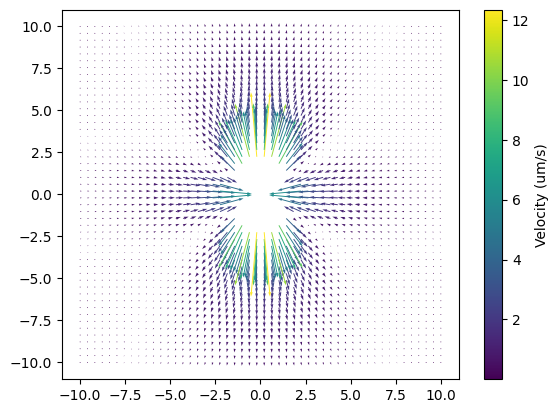

In [168]:
plt.quiver(X, Y, u[0], u[1], magnitude, cmap="viridis")
plt.colorbar(label="Velocity (um/s)")

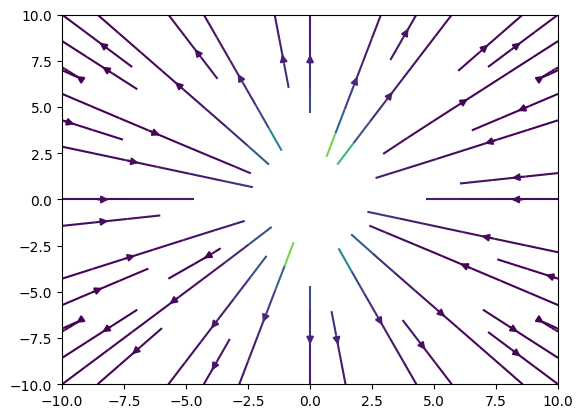

In [171]:
plt.streamplot(X, Y, u[0], u[1], .5, color=magnitude, cmap='viridis')